#Forest_Fires

classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd

In [2]:
ffire = pd.read_csv("/content/forestfires.csv")
ffire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# EDA

In [3]:
# row and column
ffire.shape

(517, 31)

In [4]:
ffire.index       # rows

RangeIndex(start=0, stop=517, step=1)

In [5]:
# checking datatypes and null values
ffire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
 # columns
ffire.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
# Rename columns
ffire.columns = ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'fri', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'size']

In [8]:
ffire.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'size'],
      dtype='object')

In [9]:
ffire['size'].value_counts()

small    378
large    139
Name: size, dtype: int64

In [10]:
ffire['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [11]:
ffire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fri,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
ffire.corr()

<ipython-input-12-b1bdb1d7dcc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ffire.corr()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fri,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
fri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


# Visualization

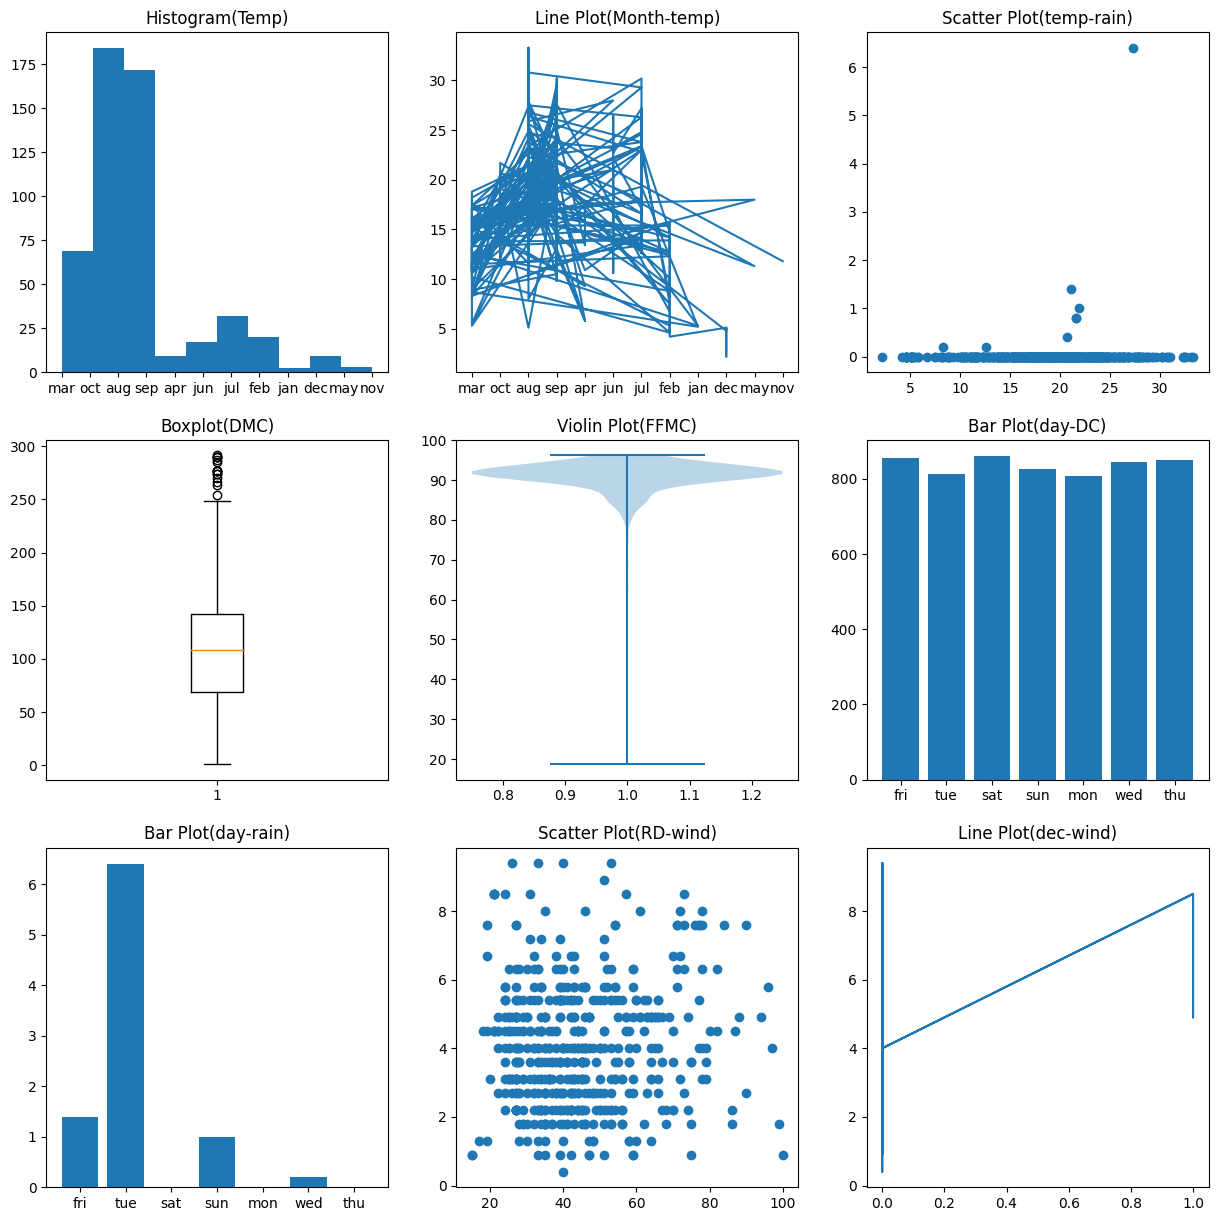

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,15))
ax[0,0].hist('month', data = ffire);ax[0,0].set_title("Histogram(Temp)")
ax[0,1].plot('month', 'temp', data = ffire);ax[0,1].set_title("Line Plot(Month-temp)")
ax[0,2].scatter('temp','rain', data = ffire);ax[0,2].set_title("Scatter Plot(temp-rain)")
ax[1,0].boxplot('DMC', data= ffire);ax[1,0].set_title("Boxplot(DMC)")
ax[1,1].violinplot('FFMC', data = ffire);ax[1,1].set_title("Violin Plot(FFMC)")
ax[1,2].bar( ffire['day'],ffire['DC']);ax[1,2].set_title("Bar Plot(day-DC)")
ax[2,0].bar('day','rain', data = ffire ); ax[2,0].set_title("Bar Plot(day-rain)")
ax[2,1].scatter('RH','wind', data = ffire);ax[2,1].set_title('Scatter Plot(RD-wind)')
ax[2,2].plot('dec', 'wind', data = ffire);ax[2,2].set_title("Line Plot(dec-wind)")
plt.show()

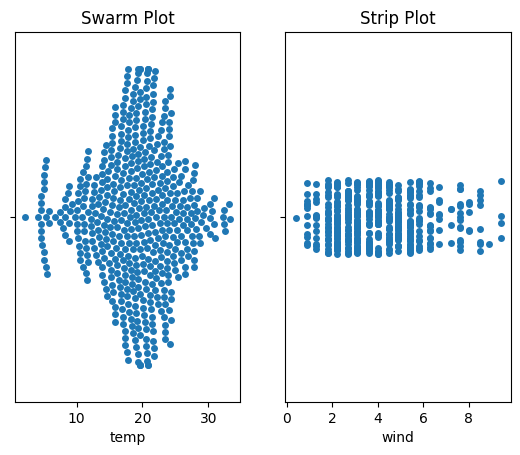

In [14]:
plt.subplot(1,2,1)
import seaborn as sns

sns.swarmplot(x='temp', data=ffire)

plt.title("Swarm Plot")
plt.subplot(1,2,2)
sns.stripplot( x='wind', data = ffire)
plt.title("Strip Plot")
plt.show()

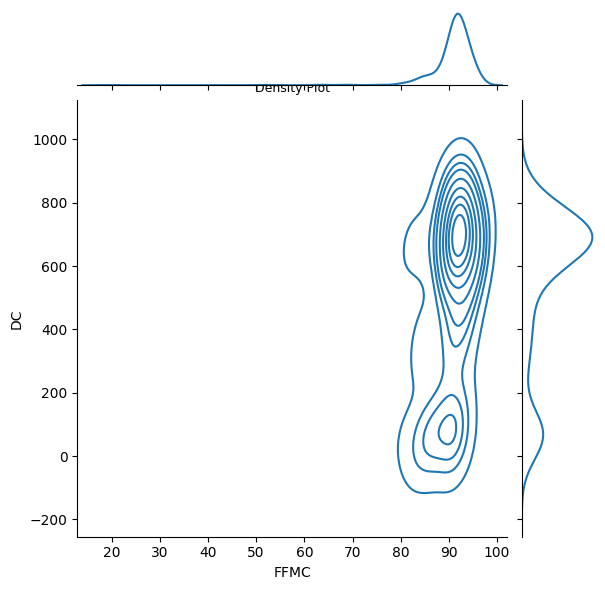

In [15]:
sns.jointplot(x='FFMC',y='DC', data = ffire, kind ='kde')
plt.title("Density Plot", size = 9)
plt.show()

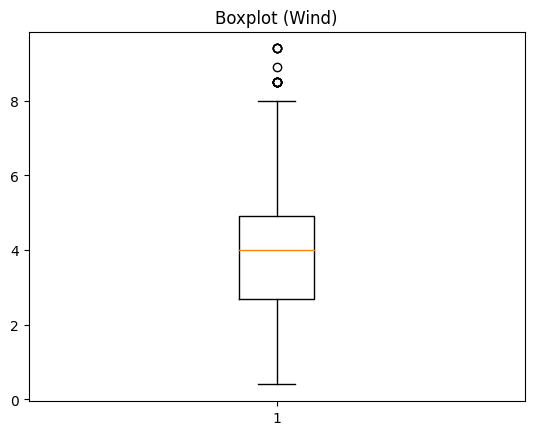

In [16]:
# Boxplot for outlier detection
plt.boxplot('wind', data= ffire); plt.title("Boxplot (Wind)")
plt.show()

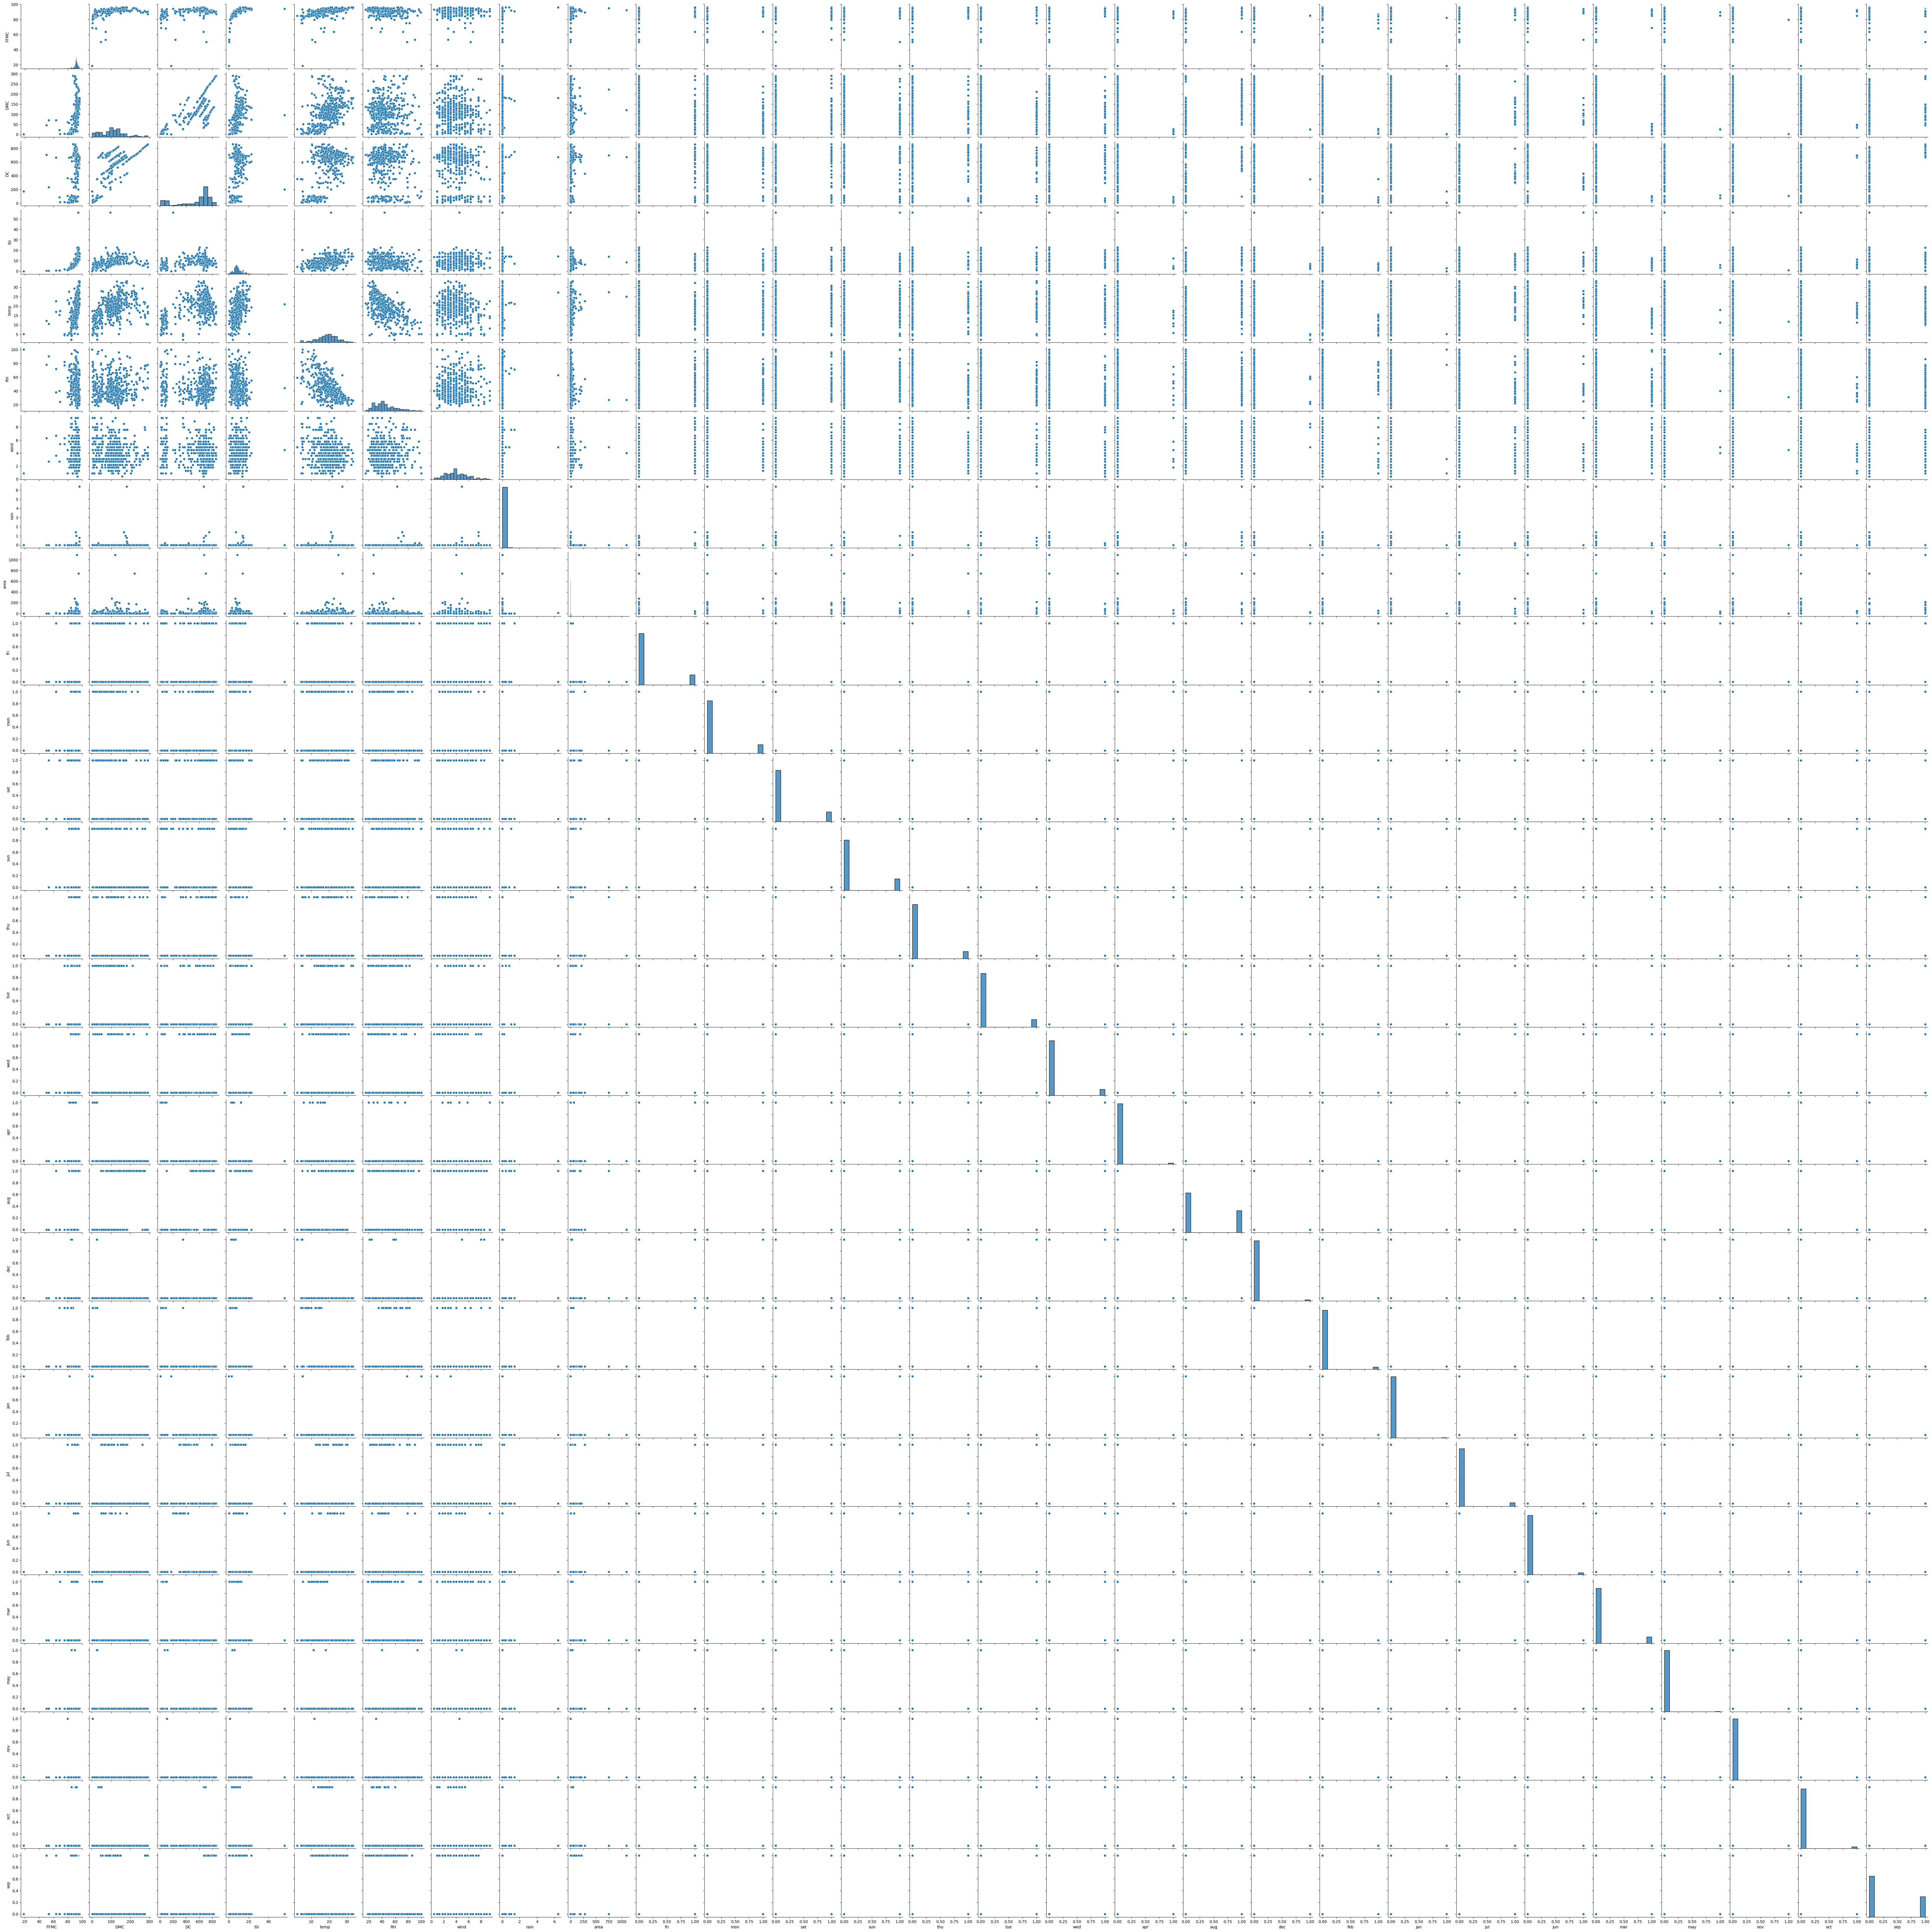

In [17]:
# plot pairplot for visualization all in one.
sns.pairplot(ffire)
plt.show()

In [18]:
ffire[ffire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,feb,jan,jul,jun,mar,may,nov,oct,sep,size
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [19]:
ffire.isna().sum()

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
fri      0
mon      0
sat      0
sun      0
thu      0
tue      0
wed      0
apr      0
aug      0
dec      0
feb      0
jan      0
jul      0
jun      0
mar      0
may      0
nov      0
oct      0
sep      0
size     0
dtype: int64

# SVC

In [20]:
ffire.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   517 non-null    object 
 1   day     517 non-null    object 
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
 11  fri     517 non-null    int64  
 12  mon     517 non-null    int64  
 13  sat     517 non-null    int64  
 14  sun     517 non-null    int64  
 15  thu     517 non-null    int64  
 16  tue     517 non-null    int64  
 17  wed     517 non-null    int64  
 18  apr     517 non-null    int64  
 19  aug     517 non-null    int64  
 20  dec     517 non-null    int64  
 21  feb     517 non-null    int64  
 22  ja

In [21]:

# Convert salary column string  to integer
# Label Encoding to convert categorical data into numeric
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
ffire['size'] = LE.fit_transform(ffire['size'])

In [22]:
# Take a sample of data set for training and testing
# Dividing dataset into input and output
X , Y = ffire.iloc[:,2:-1], ffire.iloc[:,-1]
print(X)
print(Y)

     FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  fri  ...  dec  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00    1  ...    0   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00    0  ...    0   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00    0  ...    0   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00    1  ...    0   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00    0  ...    0   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...  ...  ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44    0  ...    0   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29    0  ...    0   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16    0  ...    0   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00    0  ...    0   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00    0  ...    0   

     feb  jan  jul  jun  mar  may  nov  oct  sep  
0      0    0    0    0 

In [23]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Creating training and test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify = Y)

# Feature Scaling

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)

# Mode performance

y_pred = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.801


Accuracy is very small so we predict model using SVM.

# SVM

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [26]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((361, 28), (156, 28), (361,), (156,))

In [27]:
SVMC = SVC(random_state = 42)
svc_param_grid = {'kernel' : ['rbf', 'sigmoid', 'poly', 'linear'], 'gamma': [1,0.1,0.01,0.001], 'C': [1000,100,10,1], 'tol': [0.001,0.0008,0.0009,0.0011]}
gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(X_train, Y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


0.9834084084084085

In [28]:
# Or 2) Grid Search CV
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma': [0.5,0.1,0.1], 'C': [10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(X_train, Y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 1/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 2/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 3/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 4/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.1s
[CV 5/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 5/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 6/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 6/10; 1/24] END C=10, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=30)

In [29]:
gsv.best_params_, gsv.best_score_

({'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}, 0.9888888888888889)

In [30]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy is: ", acc)
confusion_matrix(Y_test, y_pred)

Accuracy is:  97.43589743589743


array([[ 40,   1],
       [  3, 112]])

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
import pickle
# we already Divided dataset into input and output(I.e. model building is done)
# model fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [35]:
# Predict for X Dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [36]:
y_pred_ffire = pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})

In [37]:
y_pred_ffire

,actual,predicted_prob
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
512,0,0
513,0,0
514,0,0
515,1,1


In [38]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[138   1]
 [  1 377]]


In [40]:
((138+377)/(138+1+1+377))*100

99.61315280464217

In [41]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       139
           1       1.00      1.00      1.00       378

    accuracy                           1.00       517
   macro avg       1.00      1.00      1.00       517
weighted avg       1.00      1.00      1.00       517



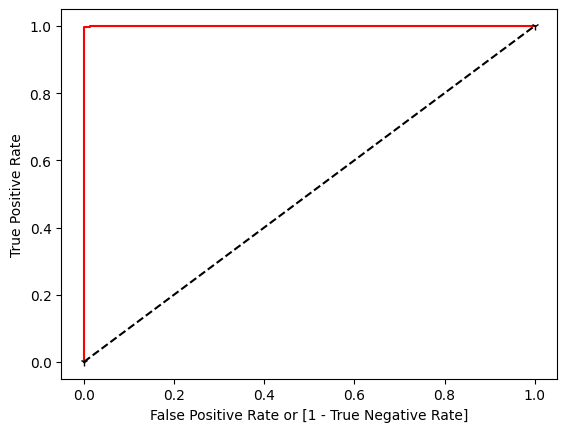

In [42]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1],[0,1], 'k--1')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel("True Positive Rate")
plt.show()

In [43]:
auc    # Accuracy


0.9950801263750904

# Decision Tree
Model building, training testing

In [44]:
# Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [47]:
# Building Decision Tree Classifier Using Entropy Criteria
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [48]:
model

DecisionTreeClassifier(max_depth=3)

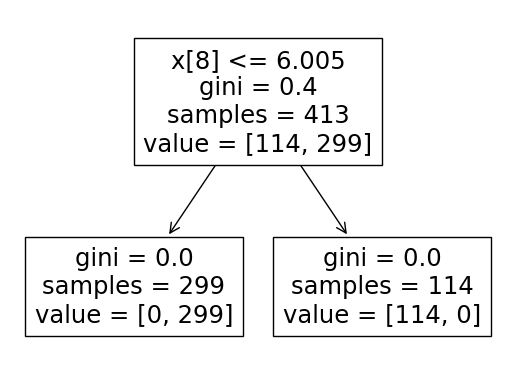

In [49]:
# Decision Tree Plot
from sklearn import tree
tree.plot_tree(model);

In [50]:
Y_train.value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [51]:
col = ffire.columns
col

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'size'],
      dtype='object')

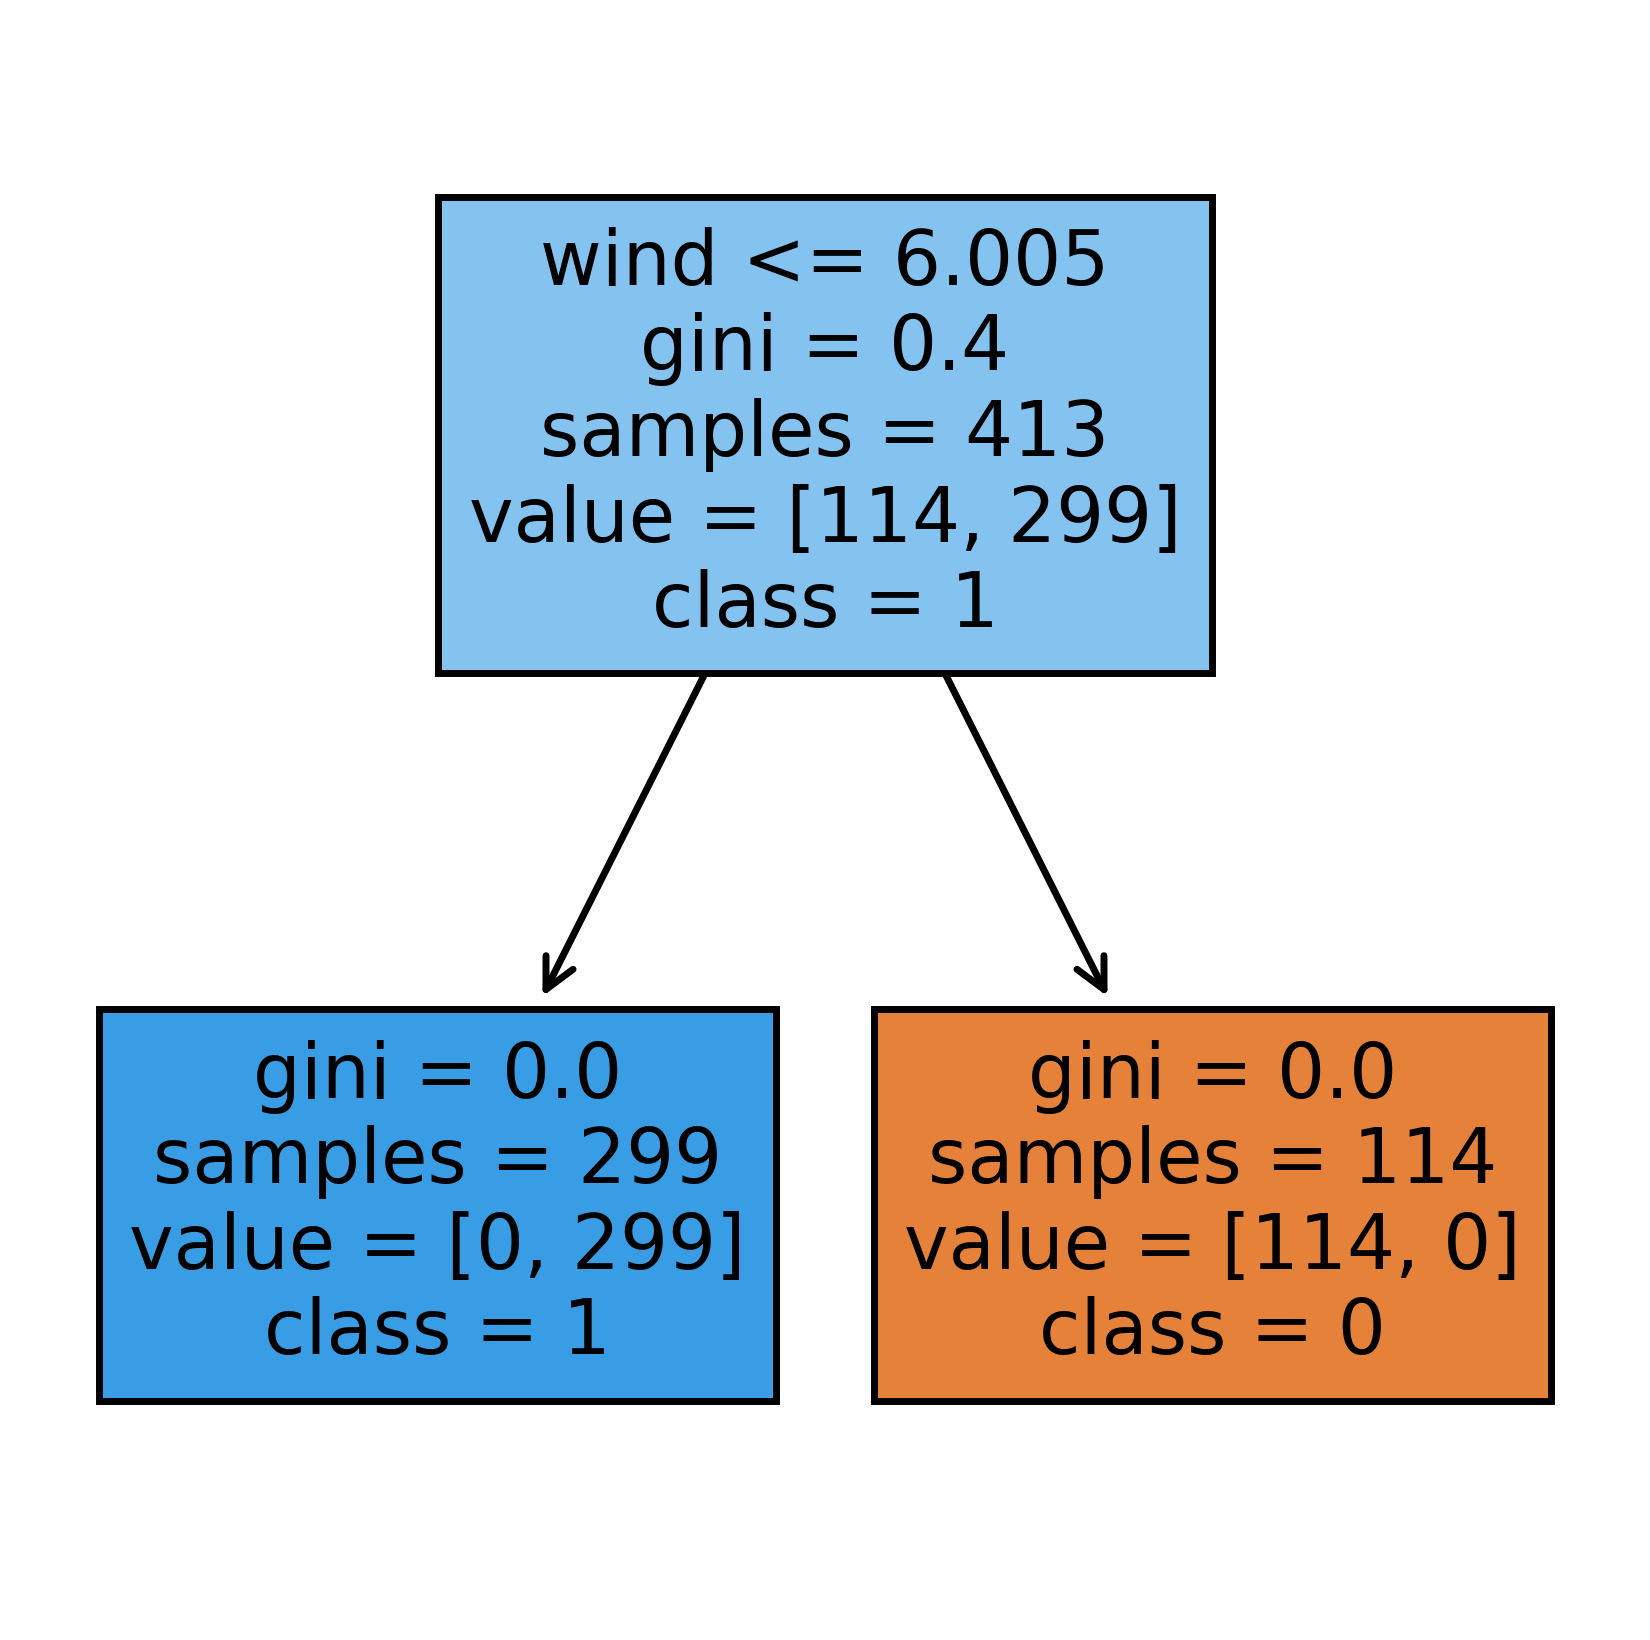

In [52]:
col = (['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep'])
cn = ['0','1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [53]:
# Predicting on test data
preds = model.predict(X_test)    # Predicting on test data set
pd.Series(preds).value_counts()   # Getting the count of each category

1    79
0    25
dtype: int64

In [54]:
Y_test.value_counts()

1    79
0    25
Name: size, dtype: int64

In [55]:
preds

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [56]:
 # Getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(Y_test, preds)

col_0,0,1
size,,
0,25,0
1,0,79


In [57]:
preds, Y_test

(array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]),
 429    1
 48     1
 321    0
 332    0
 380    0
       ..
 335    1
 82     1
 18     1
 169    1
 507    1
 Name: size, Length: 104, dtype: int64)

In [58]:
# Accuracy
from sklearn.metrics import accuracy_score
import numpy as np
np.mean(preds == Y_test), accuracy_score(Y_test, preds)

(1.0, 1.0)

In [59]:
#Building Decision Tree Classifier (CART) using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [60]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [61]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [62]:
# Prediction and Computing the accuracy
pred = model.predict(X_test)
np.mean(preds == Y_test)

1.0

In [63]:
# Decision Tree Regression Example
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [64]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [65]:
# Find the accuracy
model.score(X_test, Y_test)

1.0

# KNN Classification

In [66]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [67]:
kfold = KFold(n_splits = 10)

In [68]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is: ", results.mean())

[0.98076923 0.98076923 0.98076923 0.5        0.63461538 0.69230769
 0.78846154 0.64705882 0.7254902  0.70588235]
Accuracy is:  0.7636123680241328


In [69]:
# Grid Search for algorithm tuning
from sklearn.model_selection import GridSearchCV
import numpy as np

In [70]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [71]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [72]:
print(grid.best_score_)

0.7620612397311427
